In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import random
import sys

In [37]:
from google.colab import files
uploaded = files.upload()



Saving scripts.txt to scripts (1).txt


In [38]:
path = 'scripts.txt'
file = open(path, encoding="utf-8").read()
file = file.lower()

In [39]:
chars = sorted(list(set(file)))

char_to_int = dict((c,i) for i,c in enumerate(chars))

int_to_char = dict((i,c) for i,c in enumerate(chars))

n_chars = len(file)
n_vocab = len(chars)

In [40]:
seq_length = 60  
step = 10   
sentences = []   
next_chars = []  
for i in range(0, n_chars - seq_length, step):  
    sentences.append(file[i: i + seq_length])  
    next_chars.append(file[i + seq_length])  
n_patterns = len(sentences)    


In [41]:
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool_)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

In [42]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               94208     
                                                                 
 dense_4 (Dense)             (None, 55)                7095      
                                                                 
Total params: 101,303
Trainable params: 101,303
Non-trainable params: 0
_________________________________________________________________


In [43]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from keras.callbacks import ModelCheckpoint

filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint_dir = os.path.dirname(filepath)

checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

In [57]:
import os

os.listdir(checkpoint_dir)

['saved_weights-01-2.1018.hdf5']

In [58]:
history = model.fit(x, y,
          batch_size=128,
          epochs=100,   
          callbacks=callbacks_list)

model.save_weights('movie_script_model.h5')

Epoch 1/100
272/272 [==============================] - ETA: 0s - loss: 1.6369
Epoch 1: loss improved from inf to 1.63685, saving model to saved_weights/saved_weights-01-1.6369.hdf5
272/272 [==============================] - 49s 178ms/step - loss: 1.6369
Epoch 2/100
272/272 [==============================] - ETA: 0s - loss: 1.4784
Epoch 2: loss improved from 1.63685 to 1.47838, saving model to saved_weights/saved_weights-02-1.4784.hdf5
272/272 [==============================] - 48s 175ms/step - loss: 1.4784
Epoch 3/100
272/272 [==============================] - ETA: 0s - loss: 1.3628
Epoch 3: loss improved from 1.47838 to 1.36276, saving model to saved_weights/saved_weights-03-1.3628.hdf5
272/272 [==============================] - 48s 175ms/step - loss: 1.3628
Epoch 4/100
272/272 [==============================] - ETA: 0s - loss: 1.2606
Epoch 4: loss improved from 1.36276 to 1.26065, saving model to saved_weights/saved_weights-04-1.2606.hdf5
272/272 [==============================] - 48

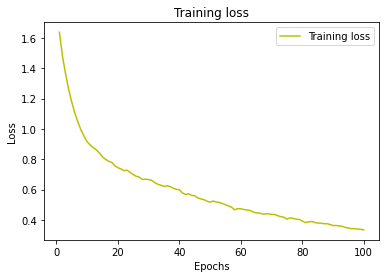

In [59]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)

In [61]:
filename = 'movie_script_model.h5'
model.load_weights(filename)

In [ ]:
start_index = random.randint(0, n_chars - seq_length - 1)

#Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = file[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')
#sys.stdout.write(generated)


for i in range(2000):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

----- Seed for our text prediction: "                            standard
               all righ"
t.................................................... nothreem.

                              standard
               kelr, head it blade's
               this space by has
               that burching we be shile wailt
               is go that buren lockere
               my it itsesed.

              them rear should hear fingers)
               what track as loby hear fings to the nearr.  is feet suy where thes flask
	blade's ges. head is blade. blade puninfly years from them findes over hosesome to seall have to the glas - ling brunding.

                              broussard
               i can't keye
               mayifliven trier, comps, yell.

     interior - buted me any we --d

     we can't karen ince a ship your back to sarkle have and take
	blade's head incless freet mught spread. hes and the dectarks.

     as he gimpbreenk, shills.

                              roby
